In [7]:
import tensorflow as tf
import pandas
import sklearn
from tensorflow import keras
from tensorflow.keras import Sequential, layers
from tensorflow.keras.layers import Dense,Flatten
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.layers import Dropout

In [8]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [9]:
def print_Examples(x_train, y_train):
    plt.figure(figsize=(10,10))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.imshow(x_train[i])
        plt.title("The label is " + str(y_train[i]))
        plt.axis("off")
        

In [17]:
def model(input_shape, num_classes,x_train, y_train,x_test,y_test, epochs):
    model = Sequential([ 
        layers.Rescaling(1./255, input_shape=input_shape), 
        layers.Conv2D(32, 3, padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2,2)), 
        layers.Dropout(0.25), # Dropout layer
        layers.Conv2D(64, 1, padding='same', activation='relu'),
        layers.Conv2D(64, 3, padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2,2)), 
        layers.Dropout(0.25), # Dropout layer
        layers.Conv2D(64, 1, padding='same', activation='relu'), # 1x1 Convolution
        layers.Flatten(), 
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5), # Dropout layer
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5), # Dropout layer
        layers.Dense(num_classes, activation="softmax") 
    ]) 

    model.compile(optimizer='adam', 
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
                metrics=['accuracy']) 

    early_stopping = EarlyStopping(monitor='val_loss', patience=5)
    checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
    model.summary() 
    
    hist = model.fit(x_train,
    y_train,
    batch_size=32,
    epochs=epochs,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping,checkpoint])
    
    
    return model,hist


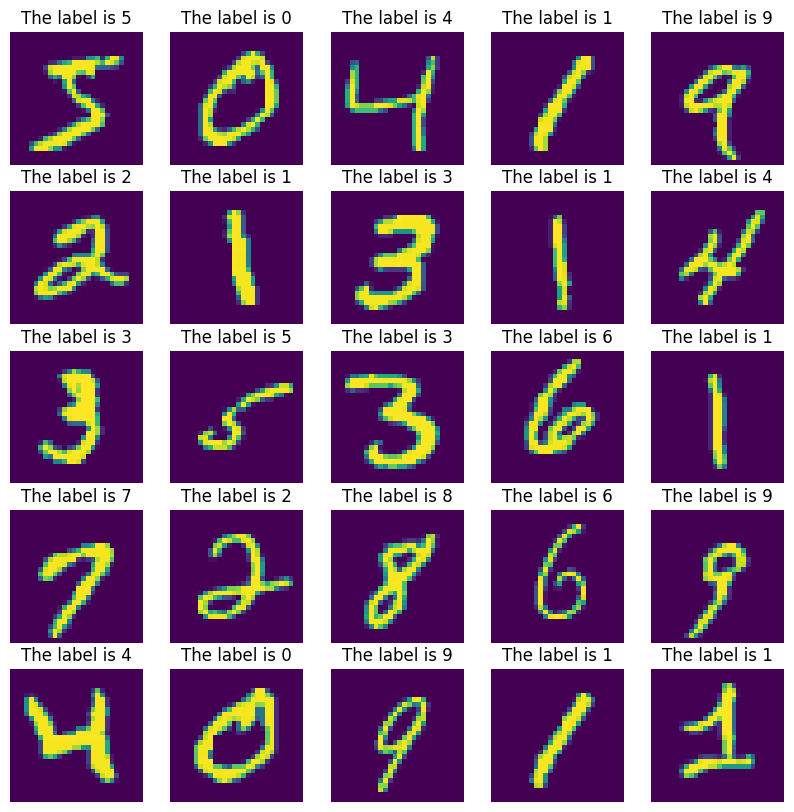

In [11]:
print_Examples(x_train, y_train)

In [18]:

epochs=30
model,hist = model((28,28,1), 10,x_train,y_train,x_test, y_test,epochs)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 28, 28, 1)         0         
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_8 (Bat  (None, 28, 28, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)       

2024-01-10 17:26:16.001253: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_2/dropout_8/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1869/1875 [============================>.] - ETA: 0s - loss: 0.2563 - accuracy: 0.9214
Epoch 1: val_accuracy improved from -inf to 0.98430, saving model to best_model.h5
1875/1875 [==============================] - 20s 9ms/step - loss: 0.2558 - accuracy: 0.9215 - val_loss: 0.0481 - val_accuracy: 0.9843
Epoch 2/30
1874/1875 [============================>.] - ETA: 0s - loss: 0.1135 - accuracy: 0.9658
Epoch 2: val_accuracy improved from 0.98430 to 0.98760, saving model to best_model.h5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1134 - accuracy: 0.9658 - val_loss: 0.0357 - val_accuracy: 0.9876
Epoch 3/30
1872/1875 [============================>.] - ETA: 0s - loss: 0.0907 - accuracy: 0.9735
Epoch 3: val_accuracy improved from 0.98760 to 0.99070, saving model to best_model.h5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0908 - accuracy: 0.9735 - val_loss: 0.0281 - val_accuracy: 0.9907
Epoch 4/30
1872/1875 [============================>.] - ETA

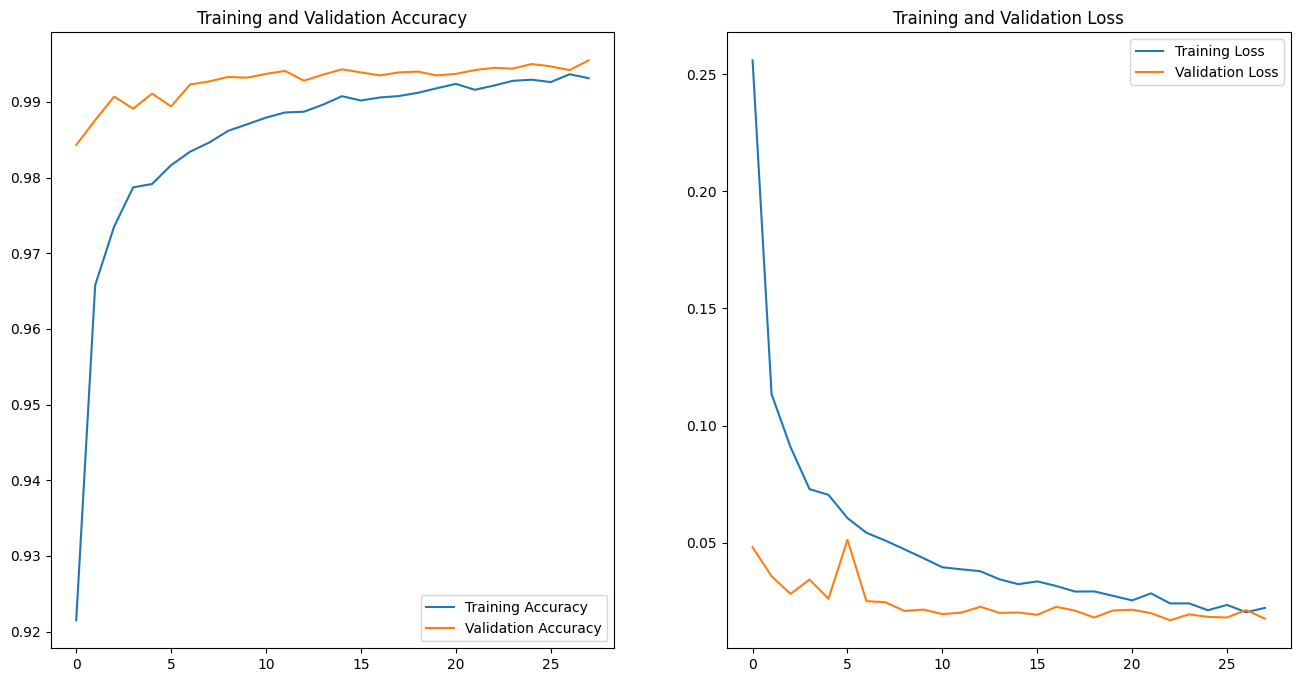

In [19]:
#Accuracy 
acc = hist.history['accuracy'] 
val_acc = hist.history['val_accuracy'] 

#loss 

loss = hist.history['loss'] 
val_loss = hist.history['val_loss'] 

#epochs 
epochs_range = range(len(acc))

#Plotting graphs 
plt.figure(figsize=(16, 8)) 
plt.subplot(1, 2, 1) 
plt.plot(epochs_range, acc, label='Training Accuracy') 
plt.plot(epochs_range, val_acc, label='Validation Accuracy') 
plt.legend(loc='lower right') 
plt.title('Training and Validation Accuracy') 

plt.subplot(1, 2, 2) 
plt.plot(epochs_range, loss, label='Training Loss') 
plt.plot(epochs_range, val_loss, label='Validation Loss') 
plt.legend(loc='upper right') 
plt.title('Training and Validation Loss') 
plt.show() 


In [20]:
results = model.evaluate(x_test, y_test, batch_size=128)
results[1]

79/79 [==============================] - 1s 5ms/step - loss: 0.0176 - accuracy: 0.9955


0.9955000281333923

In [15]:
# model.save(f'model{results[1]}.h5',overwrite=True)

In [21]:
import os
import tensorflow as tf

# Load the saved model
model = tf.keras.models.load_model('best_model.h5')

# Evaluate the model to get the validation accuracy
val_loss, val_acc = model.evaluate(x_test, y_test)

# Rename the model file
os.rename('best_model.h5', f'model{val_acc}.h5')


313/313 [==============================] - 2s 5ms/step - loss: 0.0176 - accuracy: 0.9955
